A notebook to check on the rotated giops test_datasets

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os

%matplotlib inline

In [2]:
direction='east'
file='latlon-giops_native_grid_T_surface_cardinal_velocity.nc'
basdir='/data/hdd/test_datasets/giops/daily/'
cases=['rotated','rotated2']
us={}
vs={}
lons={}
lats={}
for case in cases:
    f=nc.Dataset(os.path.join(basdir,direction,case,file))
    us[case] = f.variables['east_vel'][0,:]
    vs[case] = f.variables['north_vel'][0,:]
    lons[case] = f.variables['nav_lon'][:]
    lats[case] = f.variables['nav_lat'][:]


rotated: 3.0 1.24468 2.99998921653
rotated2: 3.0 -3.0 2.99994331768
Diff: 6.0 -1.73378 4.74573220377e-05


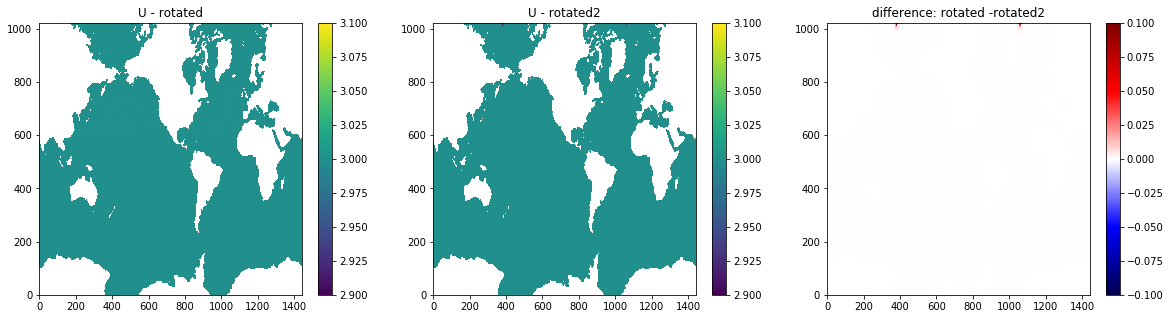

In [3]:
var='U'
fig,axs = plt.subplots(1,3,figsize=(20,5))
for case, ax in zip(cases,axs[0:2]):
    mesh=ax.pcolormesh(us[case],vmin=2.9,vmax=3.1)
    ax.set_title('{} - {}'.format(var, case))
    plt.colorbar(mesh,ax=ax)
    print('{}:'.format(case), us[case].max(), us[case].min(), us[case].mean())
diff = us[cases[0]] - us[cases[-1]]
ax=axs[-1]
mesh=ax.pcolormesh(diff,vmin=-.1,vmax=.1,cmap='seismic')
ax.set_title('difference: {} -{}'.format(cases[0],cases[-1]))
plt.colorbar(mesh,ax=ax)
print('Diff:', diff.max(),diff.min(),diff.mean())

rotated: 2.47744 -2.72961 -7.11112704187e-07
rotated2: 2.69814 -2.26216 0.000328864654595
Diff: 4.59895 -3.08855 -0.000329576018794


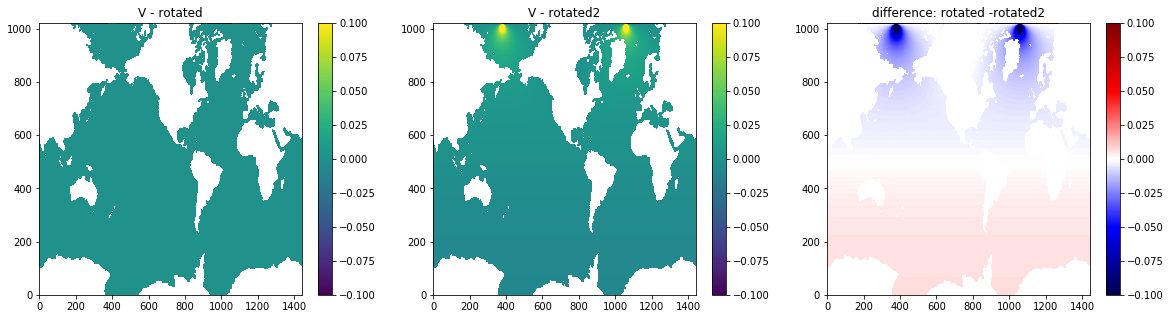

In [4]:
var='V'
fig,axs = plt.subplots(1,3,figsize=(20,5))
for case, ax in zip(cases,axs[0:2]):
    mesh=ax.pcolormesh(vs[case],vmin=-.1,vmax=.1)
    ax.set_title('{} - {}'.format(var, case))
    plt.colorbar(mesh,ax=ax)
    print('{}:'.format(case), vs[case].max(), vs[case].min(), vs[case].mean())
diff = vs[cases[0]] - vs[cases[-1]]
ax=axs[-1]
mesh=ax.pcolormesh(diff,vmin=-.1,vmax=.1,cmap='seismic')
ax.set_title('difference: {} -{}'.format(cases[0],cases[-1]))
plt.colorbar(mesh,ax=ax)
print('Diff:',diff.max(),diff.min(),diff.mean())

* Caution: My method for calculating rotation angle (rotated2) appears to be less accurate. Errors are largest near the north fold

# Quivers

/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


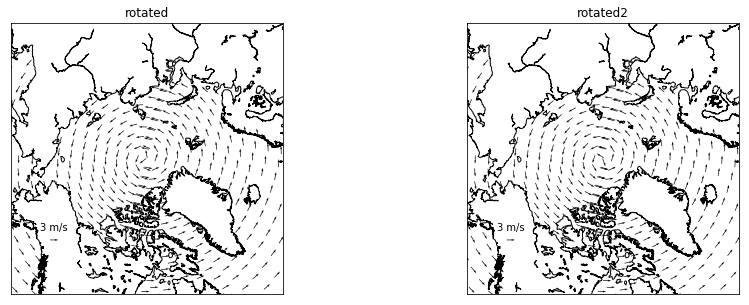

In [5]:
fig,axs= plt.subplots(1,2,figsize=(15,5))
st=20
scale=100
for ax, case in zip(axs, cases):
    m = Basemap(projection='npstere',boundinglat=60,lon_0=270,resolution='l',ax=ax)
    m.drawcoastlines()
    ubm, vbm, x, y = m.rotate_vector(us[case], vs[case], lons[case], lats[case], returnxy=True)
    q = m.quiver(x[::st,::st],y[::st,::st],ubm[::st,::st],vbm[::st,::st],scale=scale,ax=ax)
    ax.quiverkey(q, 0.16,0.2,3, '3 m/s', coordinates='axes')
    ax.set_title(case)

* Differences near the northfold...
